In [1]:
import mlgrad.pca as pca
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.inventory as inventory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/HIP_star.csv", sep=',')
df.dropna(inplace=True)
df

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [3]:
X = df["Vmag"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["B-V"].values

# X = np.log(X)
# Y = np.log(Y)

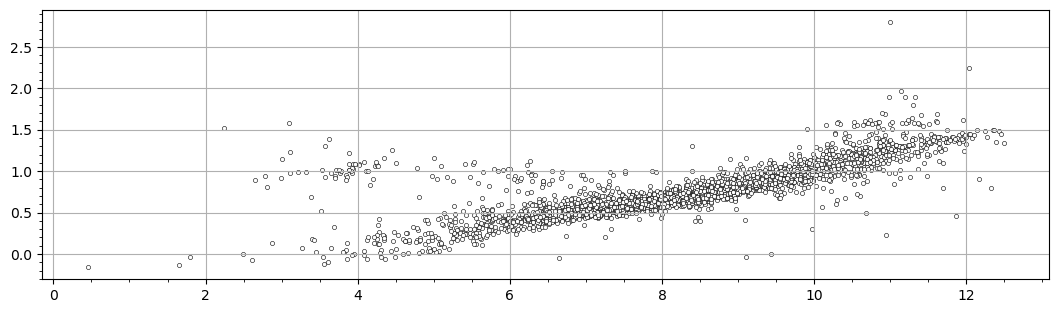

In [4]:
plt.figure(figsize=(13.0, 3.5))
plt.scatter(X, Y, s=9, c='w', edgecolors='k', linewidth=0.4)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [5]:
XY = np.c_[X, Y]
print(len(XY))

2678


In [6]:
c0 = pca.location(XY)
S0 = pca.scatter_matrix(XY - c0)
S0 = S0 / np.linalg.det(S0) ** (1/2)
S0 = np.linalg.inv(S0)
print(c0)
print(S0)

[8.215 0.762]
[[ 0.271 -1.226]
 [-1.226  9.242]]


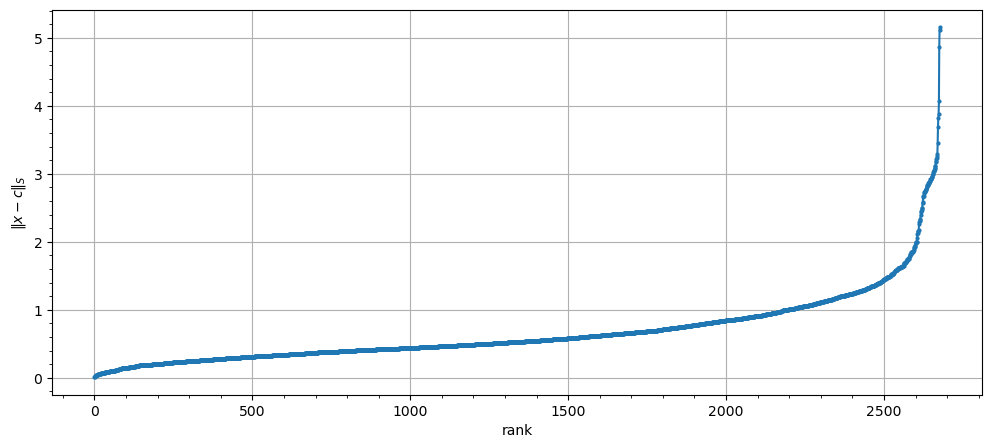

In [7]:
XY0 = XY - c0
plt.figure(figsize=(12,5))
D0 = np.sqrt([(xy @ S0) @ xy for xy in XY0])
plt.plot(sorted(D0), marker='o', markersize=2)
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

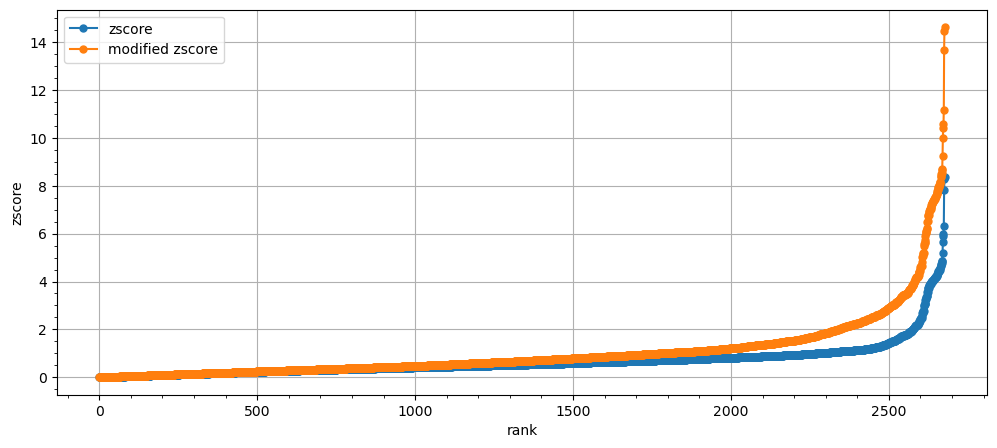

In [8]:
Z0 = inventory.zscore(D0)
Zm0 = inventory.modified_zscore(D0)
plt.figure(figsize=(12,5))
plt.plot(sorted(abs(Z0)), marker='o', markersize=5, label="zscore")
plt.plot(sorted(abs(Zm0)), marker='o', markersize=5, label="modified zscore")
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

In [9]:
maf = af.averaging_function("WM", 
                            funcs.QuantileFunc(0.9, funcs.SoftAbs_Sqrt(0.001)))
c1 = pca.robust_location(XY, maf)
S1 = pca.robust_scatter_matrix(XY - c1, maf)
S1 = S1 / np.linalg.det(S1) ** (1/2)
print(c1)
print(S1)

[8.481 0.786]
[[ 0.519 -2.752]
 [-2.752 16.514]]


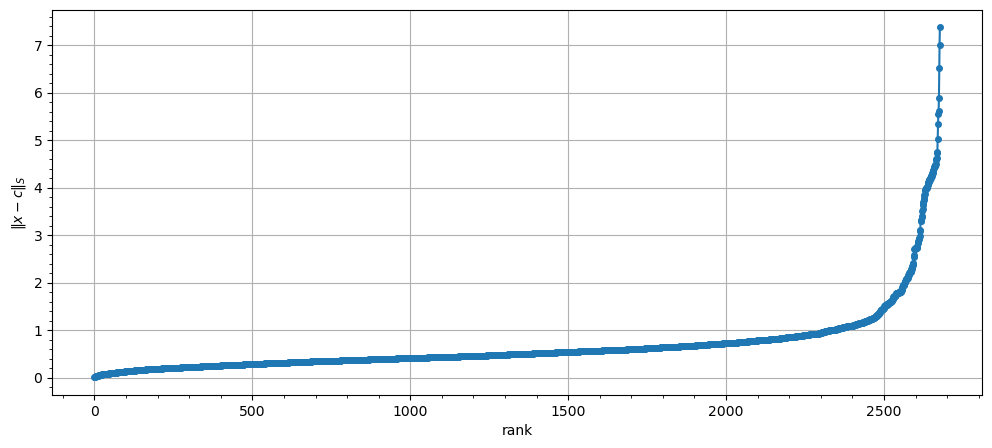

In [10]:
XY1 = XY - c1
D1 = np.sqrt([(xy @ S1) @ xy for xy in XY1])
plt.figure(figsize=(12,5))
plt.plot(sorted(D1), marker='o', markersize=4)
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

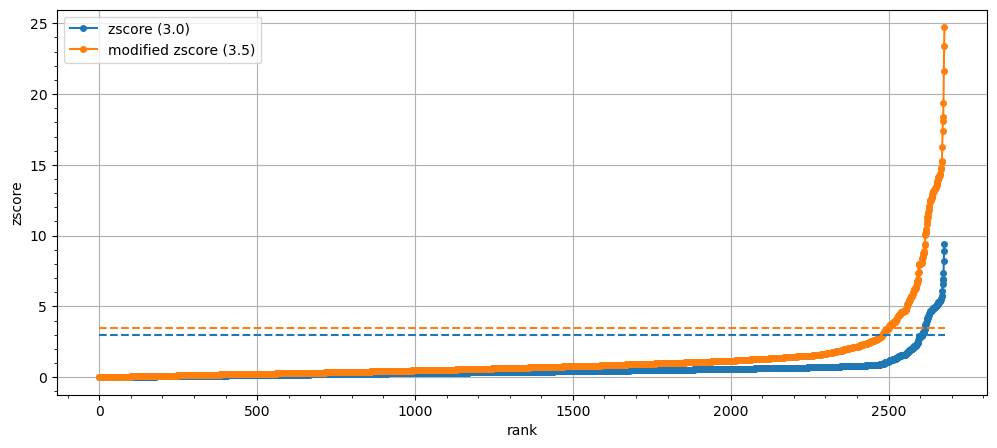

In [11]:
Z1 = inventory.zscore(D1)
Zm1 = inventory.modified_zscore(D1)
plt.figure(figsize=(12,5))
ls1 = plt.plot(sorted(abs(Z1)), marker='o', markersize=4, label="zscore (3.0)")
ls1m = plt.plot(sorted(abs(Zm1)), marker='o', markersize=4, label="modified zscore (3.5)")
plt.hlines(3.0, 0, len(XY), linestyle='--', color=ls1[0].get_color())
plt.hlines(3.5, 0, len(XY), linestyle='--', color=ls1m[0].get_color())
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

0.03225390654758124 10.473654877504574
0.027694831859919063 14.888087096181604


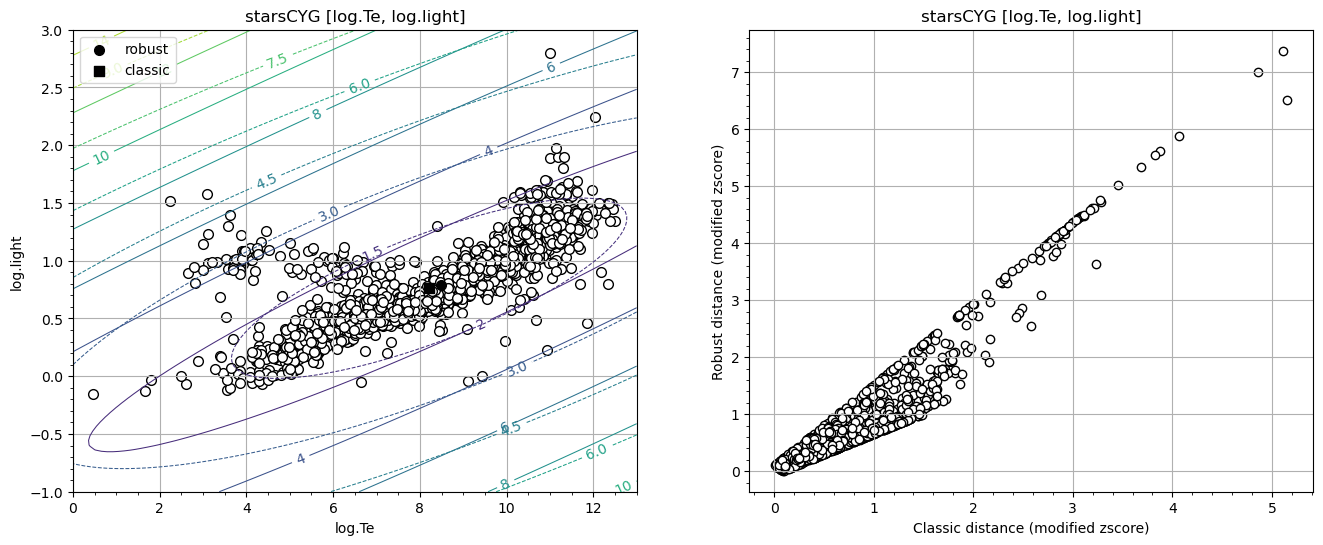

In [17]:
xrange = np.linspace(0., 13, 100)
yrange = np.linspace(-1., 3., 100)
XX2, YY2 = np.meshgrid(xrange, yrange)
XY2 = np.c_[XX2.ravel(), YY2.ravel()]

plt.figure(figsize=(16.0, 6.0))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([c1[0]], [c1[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='robust')
plt.scatter([c0[0]], [c0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='classic')
DD1 = np.sqrt([(xy-c1) @ S1 @ (xy-c1) for xy in XY2])
DD1_s = DD1.reshape(XX2.shape)
DD0 = np.sqrt([(xy-c0) @ S0 @ (xy-c0) for xy in XY2])
DD0_s = DD0.reshape(XX2.shape)
print(DD0.min(), DD0.max())
print(DD1.min(), DD1.max())
ct1 = plt.contour(XX2, YY2, DD1_s, linewidths=0.75)
plt.clabel(ct1, )
ct0 = plt.contour(XX2, YY2, DD0_s, linewidths=0.75, linestyles='--')
plt.clabel(ct0, )
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.xlabel("log.Te")
plt.ylabel("log.light")
plt.title('starsCYG [log.Te, log.light]')

plt.subplot(1,2,2)
# plt.scatter(D0, D1, c='w', edgecolors='k', linewidth=1)
# plt.xlabel('Classic distance')
# plt.ylabel('Robust distance')
plt.scatter(abs(D0), abs(D1), c='w', edgecolors='k', linewidth=1)
plt.xlabel('Classic distance (modified zscore)')
plt.ylabel('Robust distance (modified zscore)')
plt.title('starsCYG [log.Te, log.light]')
plt.grid(1)
plt.minorticks_on()

plt.show()

In [13]:
41/47

0.8723404255319149